In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from util import make_n_runs_and_avg_stats, visualize_sample
from GNNFakeNews.utils.helpers.hyperparameter_factory import HparamFactory
from GNNFakeNews.utils.helpers.gnn_model_explainer import  GNNModelExplainer
from GNNFakeNews.utils.enums import GNNModelTypeEnum, GNNDatasetTypeEnum

In [3]:
model_type = GNNModelTypeEnum.SAGE_GNN

In [4]:
model, dataset_manager, acc, prec, rec, f1 = make_n_runs_and_avg_stats(model_type, hparams=HparamFactory(model_type=model_type, dataset=GNNDatasetTypeEnum.GOSSIPCOP), n=10)
print(f'Acc: {acc}, Prec: {prec}, Rec: {rec}, F1: {f1}')

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.SAGE_GNN
dataset = GNNDatasetTypeEnum.GOSSIPCOP
batch_size = 128
lr = 0.01
weight_decay = 0.01
n_hidden = 128
epochs = 35
feature = GNNFeatureTypeEnum.BERT
concat = True
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7f341fa87f90>
#################################
Loading dataset 'gossipcop' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Loading dataset 'gossipcop' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Loading dataset 'gossipcop' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Loading dataset 'gossipcop' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Loading datase

all_last_layer_val size: (5464, 128)
all_y size: (5464,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


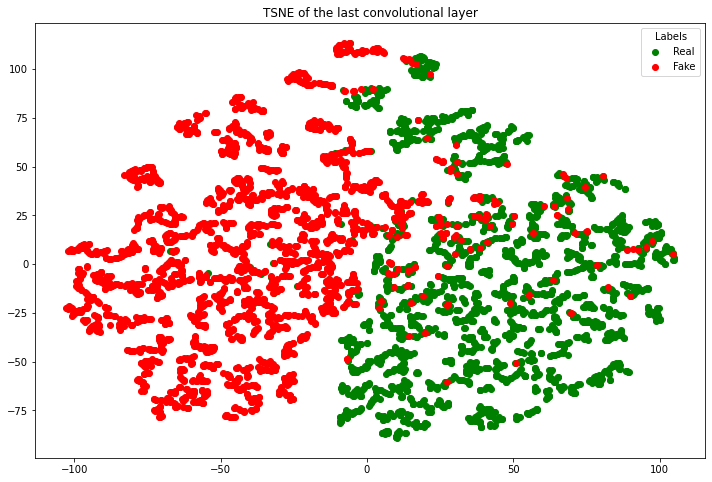

In [7]:
model.m_visualize_tsne_of_last_conv_layer(split='all', save_fig='TSNE_GraphSAGE_GOS')

In [6]:
sample_data = dataset_manager.get_random_train_samples(device=model.m_args.device)[0]
explainer = GNNModelExplainer(model, sample_data)

available idxs:  [271, 3681, 4887, 994, 1839, 3326, 4131, 5312, 519, 4408, 2001, 1866, 802, 1171, 4450, 530, 3386, 614, 1462, 1974, 2859, 3233, 916, 17, 2845, 3907, 3043, 417, 455, 4734, 4256, 1231, 2354, 2073, 3229, 4149, 3328, 4756, 3472, 4375, 2738, 3316, 577, 764, 216, 3158, 430, 609, 1762, 4438, 3542, 2248, 3105, 5284, 3536, 1450, 2424, 4232, 1652, 2639, 4710, 5095, 2923, 2174, 452, 3902, 3964, 671, 1985, 1964, 689, 3953, 3980, 5228, 66, 5272, 4536, 3540, 4592, 2893, 5016, 3500, 4116, 3152, 1960, 3097, 2225, 4003, 4657, 4129, 4874, 1782, 5340, 4412, 3335, 2270, 1689, 692, 4432, 2469, 3778, 3430, 626, 2445, 4823, 4651, 2751, 4238, 1846, 2077, 227, 3870, 1636, 2221, 2353, 4361, 5440, 454, 1748, 2956, 5089, 3994, 4543, 5289, 1279, 1236, 3937, 4808, 1915, 891, 1614, 815, 4883, 5185, 4961, 4511, 3104, 1077, 4073, 1800, 3745, 593, 92, 4655, 4287, 2547, 337, 185, 4789, 2203, 2679, 4713, 2523, 1183, 4044, 598, 2534, 2194, 2435, 116, 3739, 4719, 2870, 1137, 1646, 1345, 1850, 765, 5406, 292

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 573.73it/s]


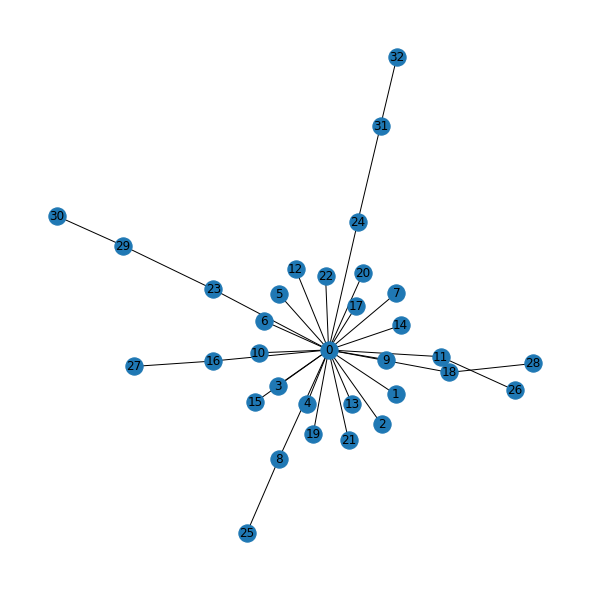

In [7]:
visualize_sample(sample_data[0])

y: Real
Removing edges with score less than 0.0912303775548935 with min torch.return_types.min(
values=tensor(0.0723),
indices=tensor(27)) and max torch.return_types.max(
values=tensor(0.9504),
indices=tensor(45))
 ############ Graph before dropping edges according to the edge mask ############
Number of nodes before dropping unimportant edges: 25


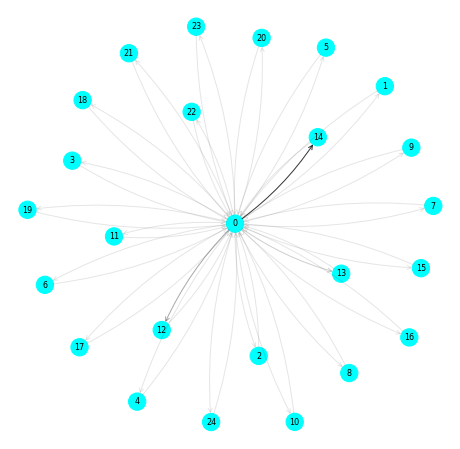

#################################################################################
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#################################################################################
 ############ Graph after dropping edges according to the edge mask ############
Dropping 49 edges out of 97
Number of nodes before dropping unimportant edges: 4


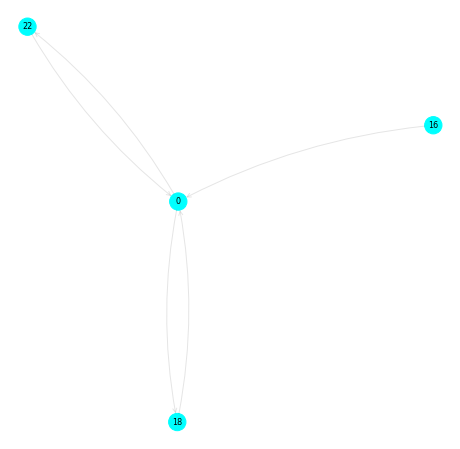

In [8]:
explainer.visualize_explaining_graph()

In [18]:
from torch_geometric.utils.convert import from_networkx
denoised_sample = from_networkx(explainer.subgraph)

In [175]:
model.m_predict(denoised_sample)

[autoreload of GNNFakeNews.utils.helpers.gnn_model_helper failed: Traceback (most recent call last):
  File "/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/sersery/De

AttributeError: 'GNNet' object has no attribute 'm_predict'

In [20]:
model.eval()

GNNet(
  (conv1): SAGEConv(768, 128)
  (lin0): Linear(in_features=768, out_features=128, bias=True)
  (lin1): Linear(in_features=256, out_features=128, bias=True)
  (lin2): Linear(in_features=128, out_features=2, bias=True)
)

In [21]:
out, y = model.m_handle_train(sample_data)

In [22]:
out

tensor([[-2.3224, -0.1032]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)

In [174]:
import torch.nn.functional as F
print(F.softmax(out, dim=1).cpu().detach().numpy()[0])


[0.09803981 0.9019602 ]


[autoreload of GNNFakeNews.utils.helpers.gnn_model_helper failed: Traceback (most recent call last):
  File "/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/sersery/De

In [24]:
sample_data.y

tensor([1], device='cuda:0')

len fake news 557
len real news 535
len fake news 265
len real news 281
len fake news 1910
len real news 1916
Total len: 5464


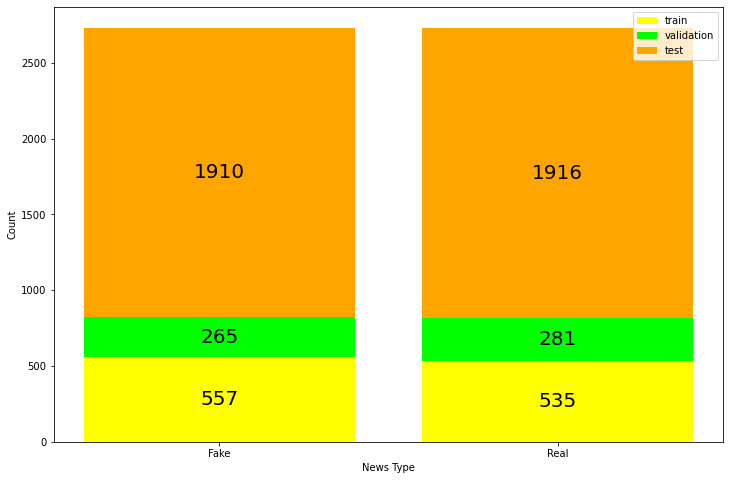

In [16]:
from util import collect_labels, plot_dataset_label_distribution_by_split
plot_dataset_label_distribution_by_split(collect_labels(dataset_manager.train_set), collect_labels(dataset_manager.val_set), collect_labels(dataset_manager.test_set))